In [18]:
pip install pca

In [19]:
import pandas as pd
import numpy as np

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
dataset = '/content/drive/MyDrive/Prak Big Data Analytics/Per-7/100 Sales Records.csv'
df_sales = pd.read_csv(dataset)
df_sales.shape

(100, 14)

In [22]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item_Type       100 non-null    object 
 3   Sales_Channel   100 non-null    object 
 4   Order_Priority  100 non-null    object 
 5   Order_Date      100 non-null    object 
 6   Order_ID        100 non-null    int64  
 7   Ship_Date       100 non-null    object 
 8   Units_Sold      100 non-null    int64  
 9   Unit_Price      100 non-null    float64
 10  Unit_Cost       100 non-null    float64
 11  Total_Revenue   100 non-null    float64
 12  Total_Cost      100 non-null    float64
 13  Total_Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [23]:
df_sales.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [24]:
df_sales_number = df_sales.select_dtypes(include=np.number)
df_sales_number

,Order_ID,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36
2,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82
4,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...
95,512878119,888,109.28,35.84,97040.64,31825.92,65214.72
96,810711038,6267,9.33,6.92,58471.11,43367.64,15103.47
97,728815257,1485,154.06,90.93,228779.10,135031.05,93748.05
98,559427106,5767,81.73,56.67,471336.91,326815.89,144521.02


In [25]:
df_sales_number.drop('Order_ID', axis=1, inplace=True)

In [26]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_sales_number)

# Change data from normalize to DataFrame
df_normalized = pd.DataFrame(normalized_data, columns=df_sales_number.columns)

df_normalized.head(10)

,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,1.724988,-0.091639,-0.168895,0.798622,0.603092,1.168192
1,-0.836083,-0.303148,-0.394831,-0.548427,-0.559505,-0.442948
2,-1.204725,1.597400,1.783101,-0.147989,0.001945,-0.497510
3,1.069345,-1.140863,-0.983250,-0.893431,-0.811994,-0.967494
4,-0.023992,1.597400,1.783101,1.323690,1.599939,0.452390
5,-0.774943,-0.091639,-0.168895,-0.422854,-0.424375,-0.358882
6,-0.338686,1.670178,1.663377,0.980621,1.086995,0.578058
7,1.062152,-0.523444,-0.534633,-0.088369,-0.182576,0.157067
8,0.338535,-0.832005,-0.717583,-0.603965,-0.545031,-0.663629
9,0.526633,-0.303148,-0.394831,-0.011914,-0.148075,0.326333


In [27]:
np.mean(normalized_data), np.std(normalized_data)

(5.551115123125783e-18, 1.0)

In [28]:
batas_rendah = -0.5
batas_tinggi = 0.5

def kategori_laba(laba):
  if laba <= batas_rendah:
    return 'Low Profit'
  elif laba <=batas_tinggi:
    return 'Middle Profit'
  else:
    return 'High Profit'

df_normalized['Profit Category'] = df_normalized['Total_Profit'].apply(kategori_laba)

df_normalized.head()

,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Profit Category
0,1.724988,-0.091639,-0.168895,0.798622,0.603092,1.168192,High Profit
1,-0.836083,-0.303148,-0.394831,-0.548427,-0.559505,-0.442948,Middle Profit
2,-1.204725,1.597400,1.783101,-0.147989,0.001945,-0.497510,Middle Profit
3,1.069345,-1.140863,-0.983250,-0.893431,-0.811994,-0.967494,Low Profit
4,-0.023992,1.597400,1.783101,1.323690,1.599939,0.452390,Middle Profit


In [29]:
df_normalized['Profit Category'].unique()

array(['High Profit', 'Middle Profit', 'Low Profit'], dtype=object)

In [30]:
from sklearn.decomposition import PCA

# Terapkan PCA dengan dua komponen utama
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_data)

# Ubah hasil PCA menjadi DataFrame
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Tampilkan lima baris pertama dari hasil PCA
principal_df

,principal component 1,principal component 2
0,1.346238,-1.877103
1,-1.145733,0.559988
2,0.914276,2.456095
3,-1.909476,-1.201382
4,2.974579,1.035561
...,...,...
95,-2.079003,0.906837
96,-2.040018,-0.710525
97,-1.725225,0.913723
98,-1.449171,-0.484334


In [31]:
pca.explained_variance_

array([4.2453853 , 1.44858739])

In [32]:
#df_pca = pd.concat([principal_df, df_normalized[['Profit Category']]], axis=1)
#df_pca

,principal component 1,principal component 2,Profit Category
0,1.346238,-1.877103,High Profit
1,-1.145733,0.559988,Middle Profit
2,0.914276,2.456095,Middle Profit
3,-1.909476,-1.201382,Low Profit
4,2.974579,1.035561,Middle Profit
...,...,...,...
95,-2.079003,0.906837,Low Profit
96,-2.040018,-0.710525,Low Profit
97,-1.725225,0.913723,Low Profit
98,-1.449171,-0.484334,Low Profit


<Figure size 640x480 with 0 Axes>

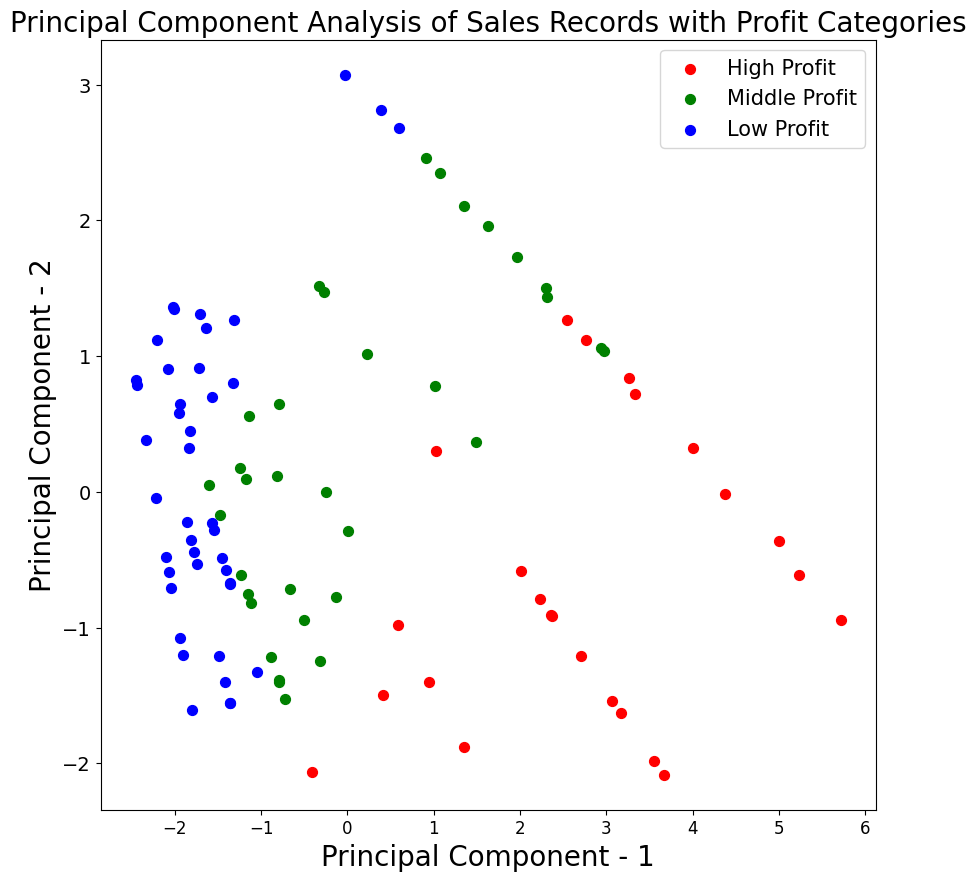

In [39]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title('Principal Component Analysis of Sales Records with Profit Categories', fontsize=20)
targets = ['High Profit', 'Middle Profit', 'Low Profit']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
  indicesToKeep = df_normalized['Profit Category'] == target
  plt.scatter(principal_df.loc[indicesToKeep, 'principal component 1'],
                                      principal_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets, prop={'size': 15})

<Figure size 640x480 with 0 Axes>

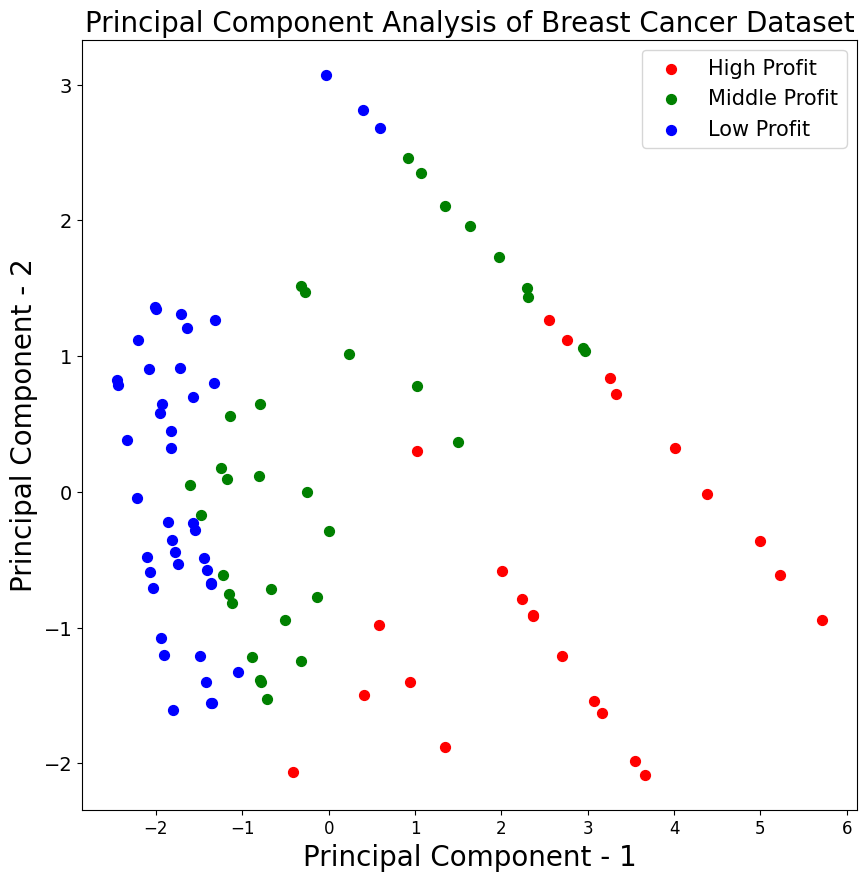

In [37]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title('Principal Component Analysis of Breast Cancer Dataset', fontsize=20)
targets = ['High Profit', 'Middle Profit', 'Low Profit']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
  indicesToKeep = df_pca['Profit Category'] == target
  plt.scatter(df_pca.loc[indicesToKeep, 'principal component 1'],
                                      df_pca.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets, prop={'size': 15})